In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
train = pd.read_csv('/content/gdrive/My Drive/Cisc_452_Neural_Network/covid_dataset/Corona_NLP_train.csv',encoding='latin-1')
test = pd.read_csv('/content/gdrive/My Drive/Cisc_452_Neural_Network/covid_dataset/Corona_NLP_test.csv',encoding='latin-1')

In [4]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Drop unrelated columns:

In [5]:
train = train.drop(columns = ['UserName', 'ScreenName', 'Location','TweetAt'])
test = test.drop(columns = ['UserName', 'ScreenName', 'Location','TweetAt'])

In [6]:
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Word cloud of training set

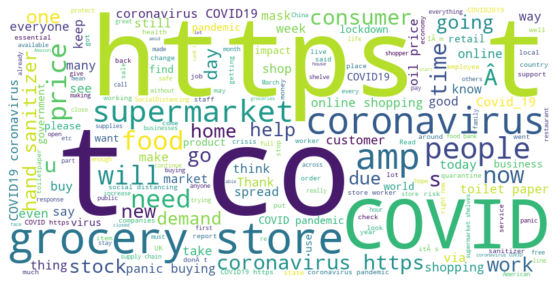

In [7]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(train.OriginalTweet))
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Plot the label distribution in the training dataset

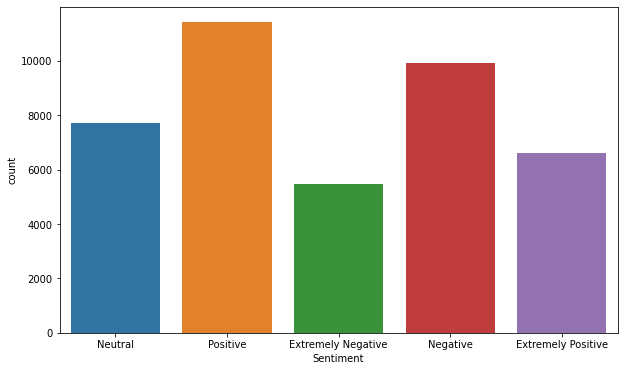

In [8]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(10,6))
sns.countplot(x = train["Sentiment"], data = train)
plt.show()

Distribution of each label

In [9]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

assign number to the label
* Extremely Positive    5
* Positive              4
* Neutral               3
* Negative              2
* Extremely Negative    1




In [10]:
train['Sentiment'] = train['Sentiment'].map({'Extremely Positive':5,'Positive':4,'Neutral':3,'Negative':2,'Extremely Negative':1})
test['Sentiment'] = test['Sentiment'].map({'Extremely Positive':5,'Positive':4,'Neutral':3,'Negative':2,'Extremely Negative':1})

# Preprocess the data

In [11]:
# code from https://www.kaggle.com/code/tharunikag/corona-virus-tweets-classification
# Cleaning the text
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet1= re.sub(r'http\S+', ' ', data['OriginalTweet'][i])
        #remove html tags
        tweet2 = re.sub(r'<.*?>',' ', tweet1) 
        #remove digits
        tweet3 = re.sub(r'\d+',' ', tweet2)
        #remove hashtags
        tweet4 = re.sub(r'#\w+',' ', tweet3)
        review = re.sub('[^a-zA-Z]', ' ', tweet4)
        review = review.lower()
        review = review.split()
        # ps = PorterStemmer()
        # review = [ps.stem(word) for word in review if word not in all_stopwords]
        lemmatizer = WordNetLemmatizer()
        review = [lemmatizer.lemmatize(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus   

In [12]:
cleaned_x_train = preprocessor(train)
cleaned_x_test = preprocessor(test)

In [13]:
vectorizer = CountVectorizer(max_features=9000)

In [14]:
x_train = vectorizer.fit_transform(cleaned_x_train).toarray()
y_train = train['Sentiment']
x_test = vectorizer.fit_transform(cleaned_x_test).toarray()
y_test = test['Sentiment']

In [15]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape) 

x_train: (41157, 9000)
y_train: (41157,)
x_test: (3798, 9000)
y_test: (3798,)


# Model implementation

MLP Training

In [16]:
mlp=MLPClassifier(random_state=0, early_stopping=True, verbose=2)
mlp.fit(x_train, y_train)

Iteration 1, loss = 1.25487217
Validation score: 0.638727
Iteration 2, loss = 0.78052110
Validation score: 0.682945
Iteration 3, loss = 0.58964677
Validation score: 0.685617
Iteration 4, loss = 0.47398435
Validation score: 0.682216
Iteration 5, loss = 0.38670793
Validation score: 0.681487
Iteration 6, loss = 0.31599720
Validation score: 0.680029
Iteration 7, loss = 0.25754204
Validation score: 0.680758
Iteration 8, loss = 0.20880637
Validation score: 0.679786
Iteration 9, loss = 0.16926907
Validation score: 0.673469
Iteration 10, loss = 0.13638992
Validation score: 0.671040
Iteration 11, loss = 0.11102597
Validation score: 0.667153
Iteration 12, loss = 0.09028271
Validation score: 0.666910
Iteration 13, loss = 0.07504213
Validation score: 0.666667
Iteration 14, loss = 0.06418159
Validation score: 0.663022
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, random_state=0, verbose=2)

MLP Testing (accuracy, classification report, confusion matrix heatmap)

MLP Accuracy: 0.2625065824117957
              precision    recall  f1-score   support

           1       0.18      0.14      0.16       592
           2       0.28      0.40      0.33      1041
           3       0.30      0.42      0.35       619
           4       0.25      0.22      0.23       947
           5       0.19      0.05      0.07       599

    accuracy                           0.26      3798
   macro avg       0.24      0.25      0.23      3798
weighted avg       0.25      0.26      0.24      3798



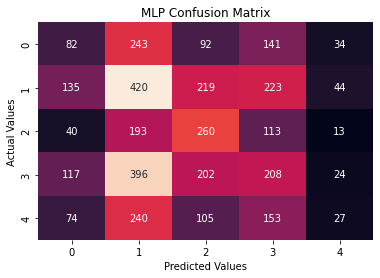

In [20]:
y_pred_mlp=mlp.predict(x_test)
cm_mlp = confusion_matrix(y_test.to_numpy(), y_pred_mlp)
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()